In [1]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [5]:
df.shape

(619040, 7)

In [6]:
df=df.dropna()
df.count()

date      619029
open      619029
high      619029
low       619029
close     619029
volume    619029
Name      619029
dtype: int64

In [12]:
df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
open,619029.000000,83.023334,97.378769,1.620000,40.220000,62.590000,94.370000,2044.000000
high,619032.000000,83.778311,98.207519,1.690000,40.620000,63.150000,95.180000,2067.990000
low,619032.000000,82.256096,96.507421,1.500000,39.830000,62.020000,93.540000,2035.110000
close,619040.000000,83.043763,97.389748,1.590000,40.245000,62.620000,94.410000,2049.000000
volume,619040.000000,4321823.395569,8693609.511968,0.000000,1070320.500000,2082093.500000,4284509.250000,618237630.000000


## Viewing the Data normality

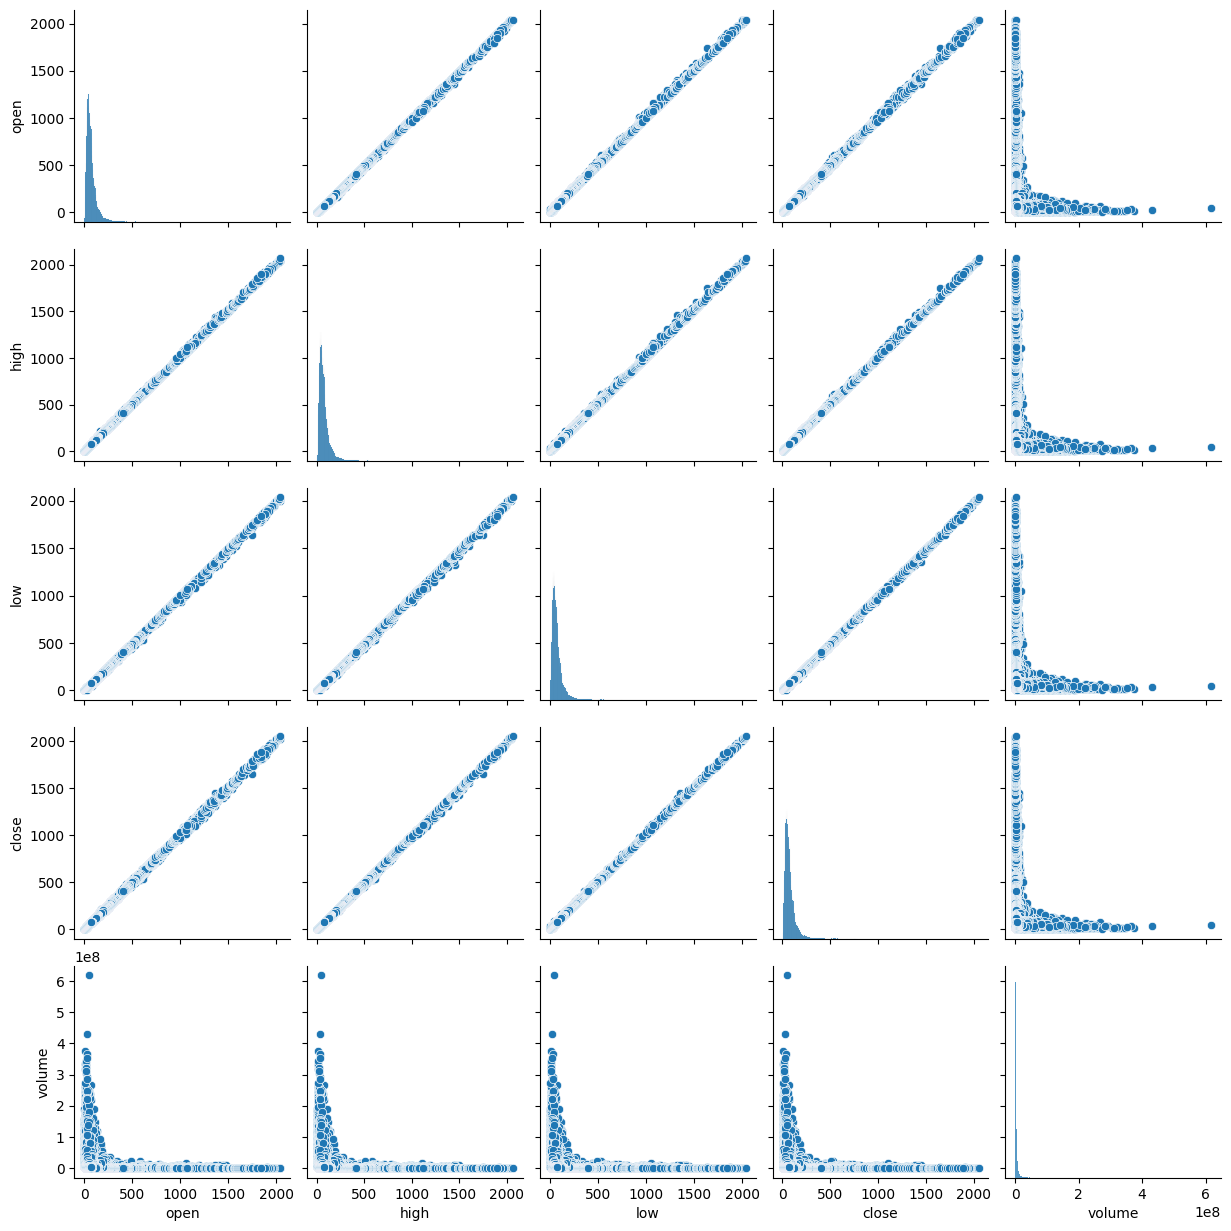

In [3]:
sns.pairplot(df)

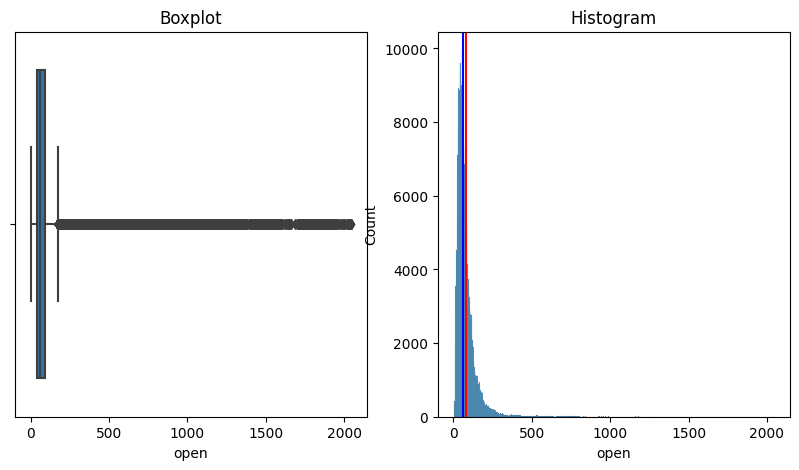

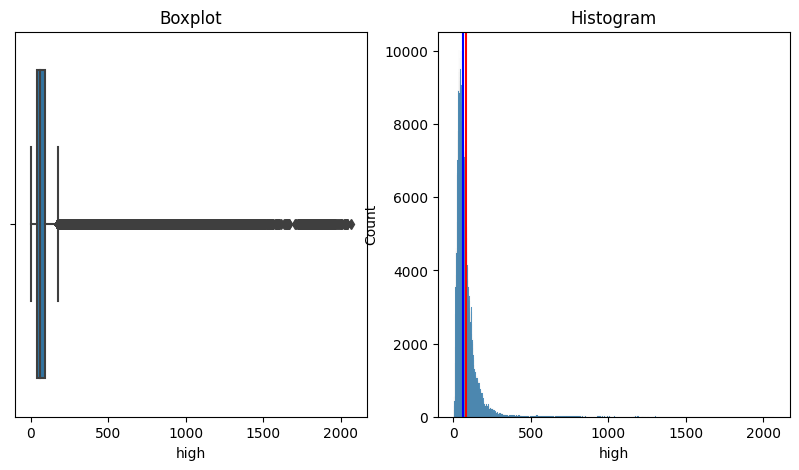

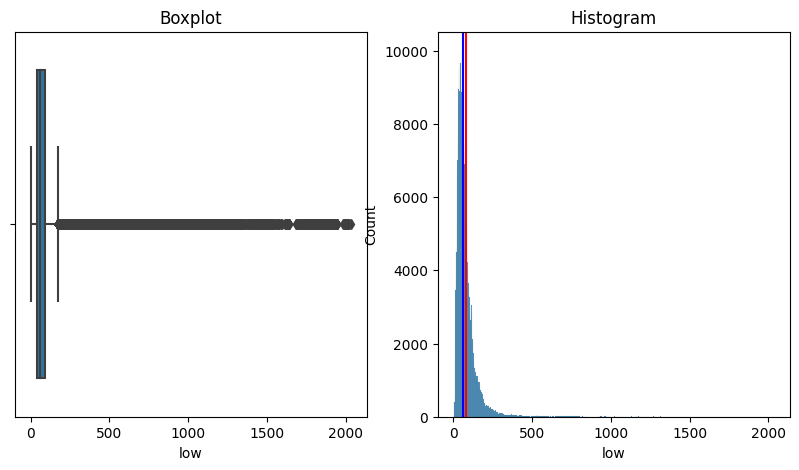

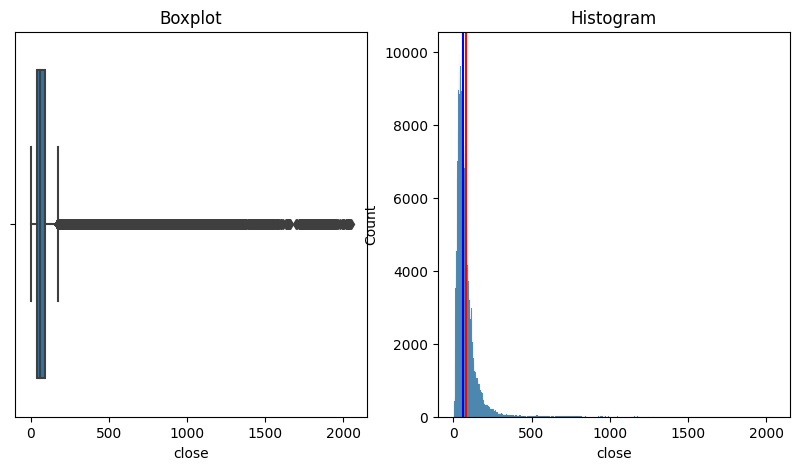

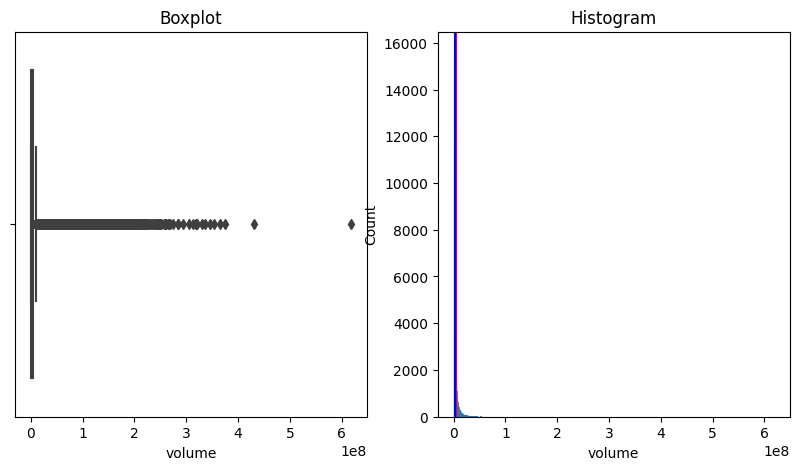

In [12]:
data = df.select_dtypes(include=[np.number])

def stat(var, data):
    # plot boxplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(x=data[var], ax=axes[0])
    axes[0].set_title('Boxplot')
    

    # plot histogram
    sns.histplot(x=data[var], ax=axes[1])
    axes[1].set_title('Histogram')
    

    # plot vertical lines for mean and median
    axes[1].axvline(x=data[var].mean(), color='r')
    axes[1].axvline(x=data[var].median(), color='b')
    plt.show()

for var in data:
    stat(var, data)


In [7]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)
iqr= Q3- Q1
print(iqr)

open           54.150
high           54.560
low            53.710
close          54.165
volume    3214188.750
dtype: float64


In [8]:
df_nor=df[~((df< (Q1 - 1.5*iqr))| (df> (Q3 + 1.5*iqr)))]
df_nor.shape

C:\Users\haier\AppData\Local\Temp\ipykernel_16356\1341407084.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_nor=df[~((df< (Q1 - 1.5*iqr))| (df> (Q3 + 1.5*iqr)))]


(619040, 7)

In [10]:
sns.pairplot(df_nor)

<AxesSubplot:>

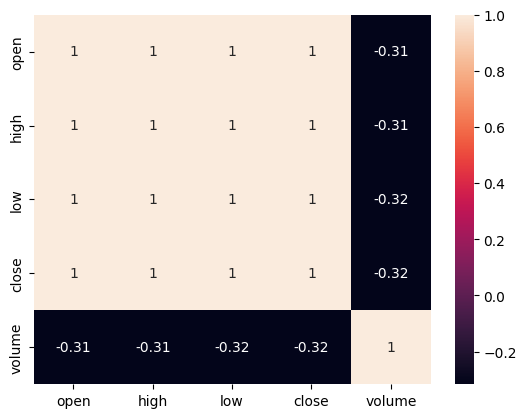

In [22]:
sns.heatmap(df_nor.corr(), annot=True)

> All the features are highly correlated each other except the `Volume` feature

# Visualization

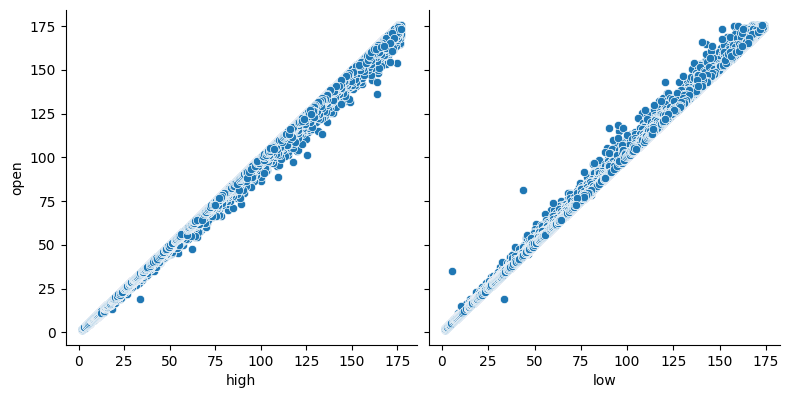

In [33]:
sns.pairplot(df_nor, x_vars=['high', 'low'], y_vars='open', height=4, kind='scatter')

In [13]:
sns.pairplot(df_nor, x_vars=['high', 'low'], y_vars='close', height=4)